In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats

# Problem 1

In [2]:
Wholesalecx_df = pd.read_csv('Wholesale+Customers+Data.csv', index_col = 0)

In [3]:
Wholesalecx_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Hotel,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
Wholesalecx_df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
436,Hotel,Other,29703,12051,16027,13135,182,2204
437,Hotel,Other,39228,1431,764,4510,93,2346
438,Retail,Other,14531,15488,30243,437,14841,1867
439,Hotel,Other,10290,1981,2232,1038,168,2125
440,Hotel,Other,2787,1698,2510,65,477,52


In [5]:
Wholesalecx_df.shape

(440, 8)

In [25]:
Wholesalecx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 440
Data columns (total 8 columns):
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


1.1. Use methods of descriptive statistics to summarize data.

Which Region and which Channel seems to spend more?

Which Region and which Channel seems to spend less?

In [22]:
Wholesalecx_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df = pd.DataFrame(Wholesalecx_df.groupby(['Region','Channel']).sum().sum(axis = 1))
df = df.rename(columns={0:'Total Amount Spent'})
df

Total Amount Spent
Region Channel                    
Lisbon Hotel               1538342
       Retail               848471
Oporto Hotel                719150
       Retail               835938
Other  Hotel               5742077
       Retail              4935522

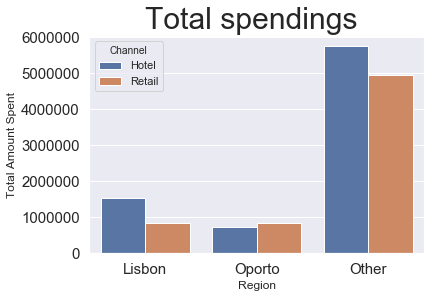

In [37]:
df = df.reset_index()
sns.barplot(x = 'Region', y = 'Total Amount Spent', hue ='Channel',  data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Total spendings', fontsize=30)
plt.show()

In [41]:
avdf = pd.DataFrame(Wholesalecx_df.groupby(['Region','Channel']).median().mean(axis = 1))
avdf = avdf.rename(columns={0:'Average Amount Spent'})
avdf

Average Amount Spent
Region Channel                      
Lisbon Hotel             2755.333333
       Retail            6168.500000
Oporto Hotel             3100.666667
       Retail            5660.166667
Other  Hotel             2943.166667
       Retail            5815.666667

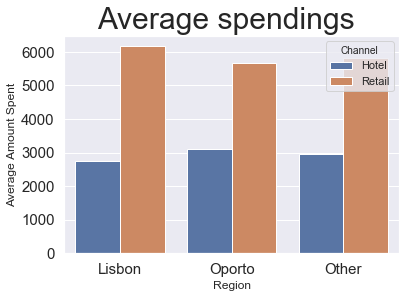

In [42]:
avdf = avdf.reset_index()
sns.barplot(x = 'Region', y = 'Average Amount Spent', hue ='Channel',  data = avdf)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Average spendings', fontsize=30)
plt.show()

In [48]:
Region_df = Wholesalecx_df.groupby(['Region']).sum().sum(axis = 1).reset_index()
Region_df = Region_df.rename(columns={0:'Total Amount Spent in each Region'})
Region_df = Region_df.sort_values('Total Amount Spent in each Region', ascending=False)
Region_df

,Region,Total Amount Spent in each Region
2,Other,10677599
0,Lisbon,2386813
1,Oporto,1555088


In [13]:
Max_spending_region = Wholesalecx_df.groupby(['Region']).sum().sum(axis = 1).reset_index()
Max_spending_region = Max_spending_region.rename(columns={0:'Total spent'})
Max_spending_region.loc[Max_spending_region['Total spent']==max(Max_spending_region['Total spent'])]

,Region,Total spent
2,Other,10677599


In [14]:
Min_spending_region = Wholesalecx_df.groupby(['Region']).sum(axis = 1).reset_index()
Min_spending_region = Max_spending_region.rename(columns={0:'Total spent'})
Min_spending_region.loc[Min_spending_region['Total spent']==min(Min_spending_region['Total spent'])]

,Region,Total spent
1,Oporto,1555088


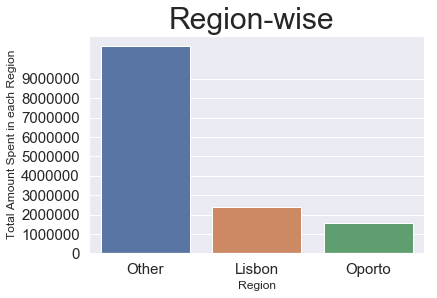

In [52]:
sns.barplot(x = 'Region', y = 'Total Amount Spent in each Region', data = Region_df)
plt.yticks(np.arange(0,10000000,1000000));
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Region-wise', fontsize=30)
plt.show()

In [53]:
Channel_df = Wholesalecx_df.groupby(['Channel']).sum().sum(axis = 1).reset_index()
Channel_df = Channel_df.rename(columns={0:'Total Amount Spent for each Channel'})
Channel_df = Channel_df.sort_values('Total Amount Spent for each Channel', ascending=False)
Channel_df

,Channel,Total Amount Spent for each Channel
0,Hotel,7999569
1,Retail,6619931


In [16]:
Max_spending_Channel = Wholesalecx_df.groupby(['Channel']).sum().sum(axis = 1).reset_index()
Max_spending_Channel = Max_spending_Channel.rename(columns={0:'Total spent'})
Max_spending_Channel.loc[Max_spending_Channel['Total spent']==max(Max_spending_Channel['Total spent'])]

,Channel,Total spent
0,Hotel,7999569


In [17]:
Min_spending_Channel = Wholesalecx_df.groupby(['Channel']).sum().sum(axis = 1).reset_index()
Min_spending_Channel = Min_spending_Channel.rename(columns={0:'Total spent'})
Min_spending_Channel.loc[Min_spending_Channel['Total spent']==min(Min_spending_Channel['Total spent'])]

,Channel,Total spent
1,Retail,6619931


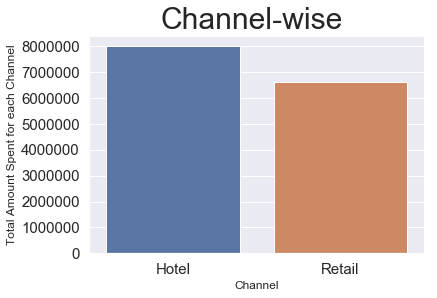

In [55]:
sns.barplot(x = 'Channel', y = 'Total Amount Spent for each Channel', data = Channel_df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Channel-wise', fontsize=30)
plt.show()

1.2. There are 6 different varieties of items are considered.

Do all varieties show similar behaviour across Region and Channel?

In [26]:
Wholesalecx_df.groupby(['Region']).median().T

Region,Lisbon,Oporto,Other
Fresh,7363.0,8090.0,8752.5
Milk,3748.0,2374.0,3684.5
Grocery,3838.0,6114.0,4732.0
Frozen,1801.0,1455.0,1498.0
Detergents_Paper,737.0,811.0,856.0
Delicatessen,806.0,898.0,994.0


In [27]:
Wholesalecx_df.groupby(['Region']).median().mean().mean()

3252.8888888888887

In [28]:
Wholesalecx_df.groupby(['Region']).sum().T

Region,Lisbon,Oporto,Other
Fresh,854833,464721,3960577
Milk,422454,239144,1888759
Grocery,570037,433274,2495251
Frozen,231026,190132,930492
Detergents_Paper,204136,173311,890410
Delicatessen,104327,54506,512110


In [29]:
Wholesalecx_df.groupby(['Channel']).median().T

Channel,Hotel,Retail
Fresh,9581.5,5993.5
Milk,2157.0,7812.0
Grocery,2684.0,12390.0
Frozen,2057.5,1081.0
Detergents_Paper,385.5,5614.5
Delicatessen,821.0,1350.0


In [30]:
Wholesalecx_df.groupby(['Channel']).median().mean().mean()

4327.291666666667

In [31]:
Wholesalecx_df.groupby(['Channel']).sum().T

Channel,Hotel,Retail
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988


<Figure size 2160x7200 with 0 Axes>

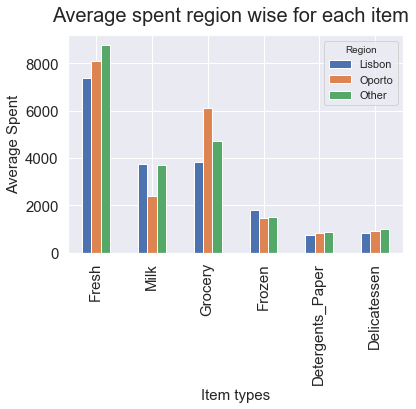

In [59]:
plt.figure(figsize=(30, 100))
new_df = Wholesalecx_df.drop(['Channel'], axis = 1)
new_df = new_df.groupby('Region').median().T
new_df.plot.bar(rot=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Item types', fontsize=15)
plt.ylabel('Average Spent', fontsize=15)
plt.suptitle('Average spent region wise for each item', fontsize=20)
plt.show()

<Figure size 2160x7200 with 0 Axes>

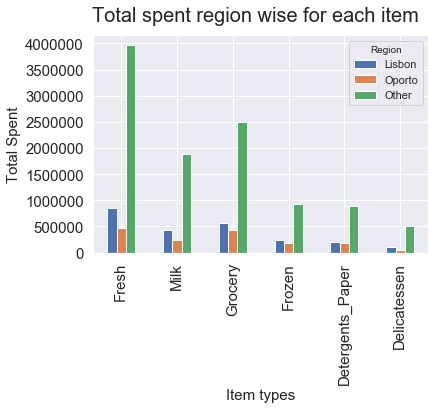

In [61]:
plt.figure(figsize=(30, 100))
new_df = Wholesalecx_df.drop(['Channel'], axis = 1)
new_df = new_df.groupby('Region').sum().T
new_df.plot.bar(rot=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Item types', fontsize=15)
plt.ylabel('Total Spent', fontsize=15)
plt.suptitle('Total spent region wise for each item', fontsize=20)
plt.show()

<Figure size 2160x7200 with 0 Axes>

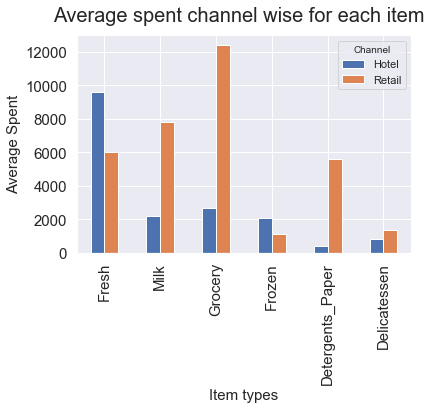

In [62]:
plt.figure(figsize=(30, 100))
new_df = Wholesalecx_df.drop(['Region'], axis = 1)
new_df = new_df.groupby('Channel').median().T
new_df.plot.bar(rot=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Item types', fontsize=15)
plt.ylabel('Average Spent', fontsize=15)
plt.suptitle('Average spent channel wise for each item', fontsize=20)
plt.show()

<Figure size 2160x7200 with 0 Axes>

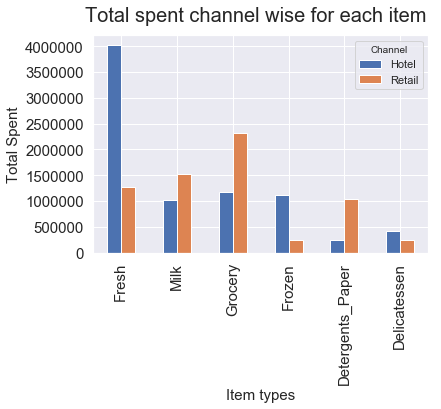

In [63]:
plt.figure(figsize=(30, 100))
new_df = Wholesalecx_df.drop(['Region'], axis = 1)
new_df = new_df.groupby('Channel').sum().T
new_df.plot.bar(rot=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Item types', fontsize=15)
plt.ylabel('Total Spent', fontsize=15)
plt.suptitle('Total spent channel wise for each item', fontsize=20)
plt.show()

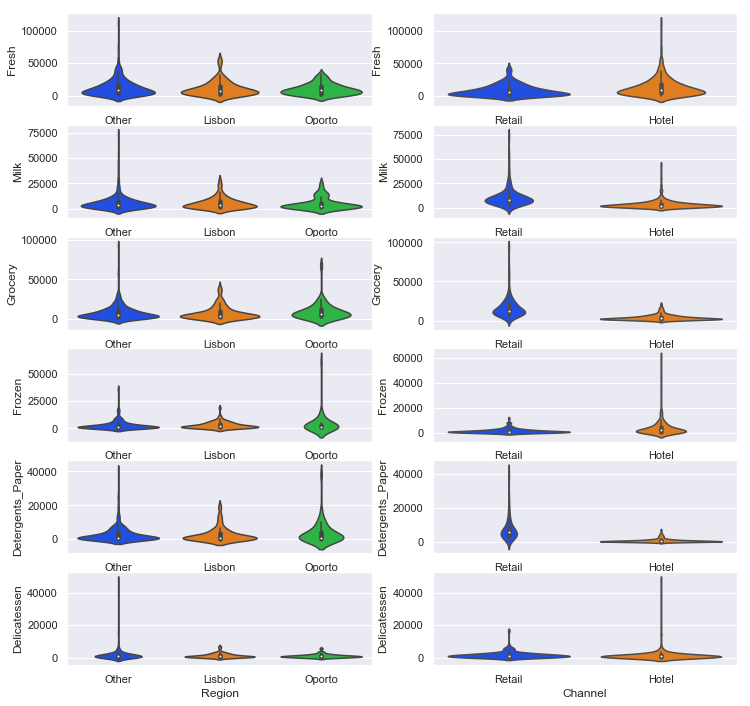

In [44]:
sns.set_palette("bright")
plt.figure(figsize=(12, 12))
column_names = Wholesalecx_df.columns[2:]
n=0
for i in column_names:
    n=n+1
    plt.subplot(6, 2, n) 
    sns.violinplot(x="Region", y=Wholesalecx_df[i], data=Wholesalecx_df);
    n=n+1
    plt.subplot(6, 2, n) 
    sns.violinplot(x="Channel", y=Wholesalecx_df[i], data=Wholesalecx_df);

1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?

Which items shows the least inconsistent behaviour?

In [73]:
print('The following measures shows the coefficient of variation for each item')
column_names = Wholesalecx_df.columns[2:]
my_dict = {}
for x in column_names:
    avg = np.mean(Wholesalecx_df[x])
    deviation = np.std(Wholesalecx_df[x])
    cv = avg/deviation
    print(x,':',cv)
    my_dict[x] = cv  
maxi = max(my_dict.values())
mini = min(my_dict.values())
print('\n')
print('The maximum variation is observed in ',list(my_dict.keys())[list(my_dict.values()).index(maxi)])
print('The minimum variation is observed in ',list(my_dict.keys())[list(my_dict.values()).index(mini)])

The following measures shows the coefficient of variation for each item
Fresh : 0.9499205599768367
Milk : 0.7862557273451984
Grocery : 0.8376504106102224
Frozen : 0.6334985694545615
Detergents_Paper : 0.6050464059684242
Delicatessen : 0.5413293879868332


The maximum variation is observed in  Fresh
The minimum variation is observed in  Delicatessen


In [13]:
Wholesalecx_df.describe().loc[['mean','std']]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937


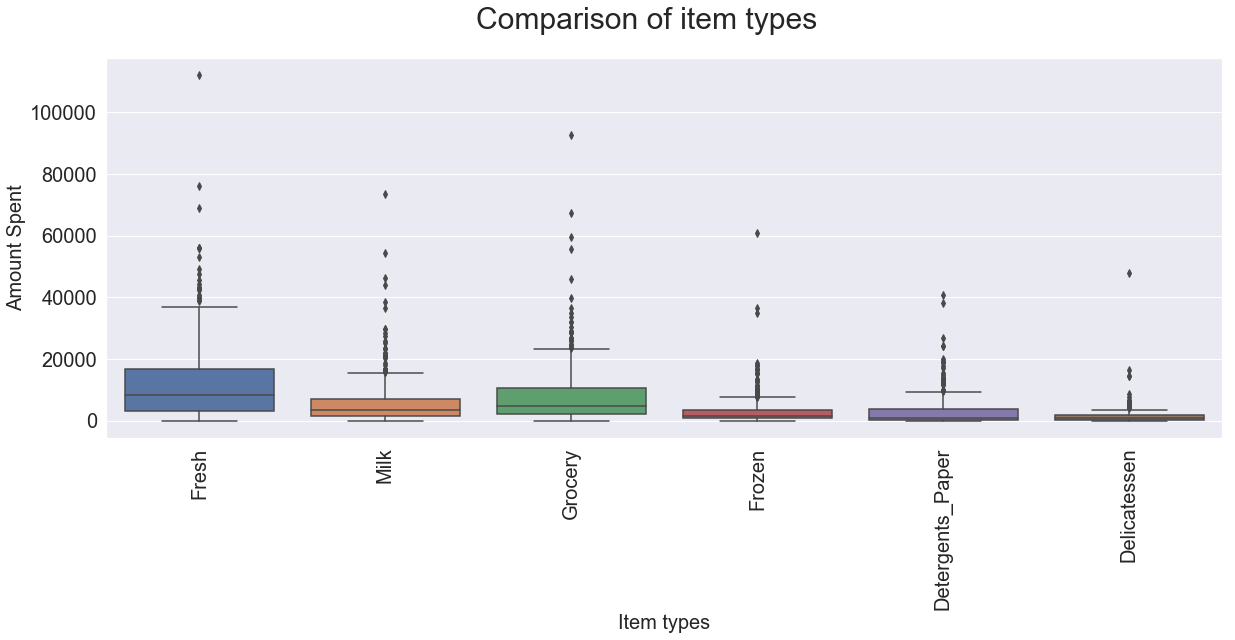

In [73]:
plt.figure(figsize=(20, 7))
new_df = Wholesalecx_df.drop(['Channel', 'Region'], axis = 1)
sns.boxplot(x="variable", y="value", data=pd.melt(new_df))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Item types', fontsize=20)
plt.ylabel('Amount Spent', fontsize=20)
plt.suptitle('Comparison of item types', fontsize=30)
plt.show()

1.4. Are there any outliers in the data?

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprec

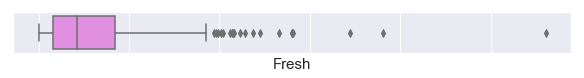

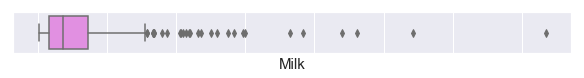

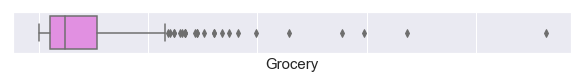

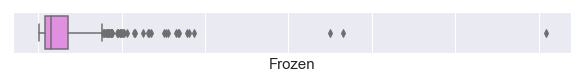

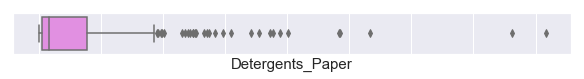

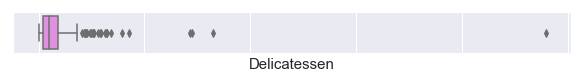

In [55]:
column_names = Wholesalecx_df.columns[2:]
n=0
for x in column_names:
    plt.figure(figsize = (10,7))
    n = n+1
    plt.subplot(len(Wholesalecx_df.columns),1,n)
    sns.boxplot(Wholesalecx_df[x], color='violet')
    plt.tick_params(labelbottom='off')
    plt.xlabel(x, fontsize=15)


In [101]:
print('The following variables have outliers :')
col_names = Wholesalecx_df.columns[2:]
for i in col_names:
    Q1 = Wholesalecx_df[i].quantile(0.25)
    Q3 = Wholesalecx_df[i].quantile(0.75)
    IQR = Q3 - Q1
    count = Wholesalecx_df[(Wholesalecx_df[i] < (Q1 - (1.5 * IQR))) | (Wholesalecx_df[i] > (Q3 + (1.5 * IQR)))][i].count()
    if(count>0):
        print(i,':',count)
    else:
        continue

The following variables have outliers :
Fresh : 20
Milk : 28
Grocery : 24
Frozen : 43
Detergents_Paper : 30
Delicatessen : 27


1.5. On the basis of this report, what are the recommendations?

# Problem 2

In [12]:
ug_stud = pd.read_csv('Survey.csv',index_col = 0)

In [13]:
ug_stud.head()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [14]:
ug_stud.tail()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [15]:
ug_stud.shape

(62, 13)

In [16]:
ug_stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 13 columns):
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 6.8+ KB


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [49]:
#2.1.1. Gender and Major
gen_major_CT = pd.crosstab(ug_stud['Gender'],ug_stud['Major'])
gen_major_CT

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [50]:
gen_major = pd.crosstab(ug_stud['Gender'],ug_stud['Major'])
gen_major['Total'] = gen_major.sum(axis = 1, skipna = True)
gen_major.loc['Total'] = gen_major.sum(axis = 0, skipna = True)
gen_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [51]:
#2.1.2. Gender and Grad Intention
gen_grad_CT = pd.crosstab(ug_stud['Gender'],ug_stud['Grad Intention'])
gen_grad_CT

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [52]:
gen_grad = pd.crosstab(ug_stud['Gender'],ug_stud['Grad Intention'])
gen_grad['Total'] = gen_grad.sum(axis = 1, skipna = True)
gen_grad.loc['Total'] = gen_grad.sum(axis = 0, skipna = True)
gen_grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [53]:
#2.1.3. Gender and Employment
gen_emp_CT = pd.crosstab(ug_stud['Gender'],ug_stud['Employment'])
gen_emp_CT

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [54]:
gen_emp = pd.crosstab(ug_stud['Gender'],ug_stud['Employment'])
gen_emp['Total'] = gen_emp.sum(axis = 1, skipna = True)
gen_emp.loc['Total'] = gen_emp.sum(axis = 0, skipna = True)
gen_emp

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [55]:
#2.1.4. Gender and Computer
gen_comp_CT = pd.crosstab(ug_stud['Gender'],ug_stud['Computer'])
gen_comp_CT

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [56]:
gen_comp = pd.crosstab(ug_stud['Gender'],ug_stud['Computer'])
gen_comp['Total'] = gen_comp.sum(axis = 1, skipna = True)
gen_comp.loc['Total'] = gen_comp.sum(axis = 0, skipna = True)
gen_comp

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [57]:
#2.2.1. What is the probability that a randomly selected CMSU student will be male? 
#What is the probability that a randomly selected CMSU student will be female?
gender_count = ug_stud.groupby('Gender').size().reset_index()
gender_count = gender_count.rename(columns = {0:'Count'})
gender_count['Probability_gender'] = gender_count['Count']/gender_count['Count'].sum()
gender_count

,Gender,Count,Probability_gender
0,Female,33,0.532258
1,Male,29,0.467742


In [58]:
#2.2.2. Find the conditional probability of different majors among the male students in CMSU. 
#Find the conditional probability of different majors among the female students of CMSU.
gen_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [59]:
#P(major|male)
major_male = gen_major.loc['Male']/gen_major['Total'].loc['Male']
major_male.reset_index()

,Major,Male
0,Accounting,0.137931
1,CIS,0.034483
2,Economics/Finance,0.137931
3,International Business,0.068966
4,Management,0.206897
5,Other,0.137931
6,Retailing/Marketing,0.172414
7,Undecided,0.103448
8,Total,1.000000


In [60]:
#P(major|female)
major_female = gen_major.loc['Female']/gen_major['Total'].loc['Female']
major_female.reset_index()

,Major,Female
0,Accounting,0.090909
1,CIS,0.090909
2,Economics/Finance,0.212121
3,International Business,0.121212
4,Management,0.121212
5,Other,0.090909
6,Retailing/Marketing,0.272727
7,Undecided,0.000000
8,Total,1.000000


In [61]:
#2.2.3. Find the conditional probability of intent to graduate, given that the student is a male. 
#Find the conditional probability of intent to graduate, given that the student is a female.
gen_grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [62]:
#p(grad|male)
grad_male = gen_grad.loc['Male']/gen_grad['Total'].loc['Male']
grad_male.reset_index()

,Grad Intention,Male
0,No,0.103448
1,Undecided,0.310345
2,Yes,0.586207
3,Total,1.000000


In [63]:
#p(grad|female)
grad_female = gen_grad.loc['Female']/gen_grad['Total'].loc['Female']
grad_female.reset_index()

,Grad Intention,Female
0,No,0.272727
1,Undecided,0.393939
2,Yes,0.333333
3,Total,1.000000


In [64]:
#2.2.3. Find the conditional probability of employment status for the male students as well as for the female students.
gen_emp

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [65]:
#p(emp|male)
emp_male = gen_emp.loc['Male']/gen_emp['Total'].loc['Male']
emp_male.reset_index()

,Employment,Male
0,Full-Time,0.241379
1,Part-Time,0.655172
2,Unemployed,0.103448
3,Total,1.000000


In [66]:
#p(emp|female)
emp_female = gen_emp.loc['Female']/gen_emp['Total'].loc['Female']
emp_female.reset_index()

,Employment,Female
0,Full-Time,0.090909
1,Part-Time,0.727273
2,Unemployed,0.181818
3,Total,1.000000


In [67]:
#2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.
gen_comp

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [68]:
#p(comp preference|male)
comp_male = gen_comp.loc['Male']/gen_comp['Total'].loc['Male']
comp_male.reset_index()

,Computer,Male
0,Desktop,0.103448
1,Laptop,0.896552
2,Tablet,0.000000
3,Total,1.000000


In [69]:
#p(comp preference|female)
comp_female = gen_comp.loc['Female']/gen_comp['Total'].loc['Female']
comp_female.reset_index()

,Computer,Female
0,Desktop,0.060606
1,Laptop,0.878788
2,Tablet,0.060606
3,Total,1.000000


2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?

Justify your comment in each case.

In [92]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [93]:
chi2, pval, dof, exp_freq = chi2_contingency(gen_major_CT, correction = False)
pval

0.42009968345511806

In [94]:
chi2, pval, dof, exp_freq = chi2_contingency(gen_grad_CT, correction = False)
pval

0.09186837889149435

In [95]:
chi2, pval, dof, exp_freq = chi2_contingency(gen_emp_CT, correction = False)
pval

0.2304376894892966

In [96]:
chi2, pval, dof, exp_freq = chi2_contingency(gen_comp_CT, correction = False)
pval

0.3474320117040881

2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. 
For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

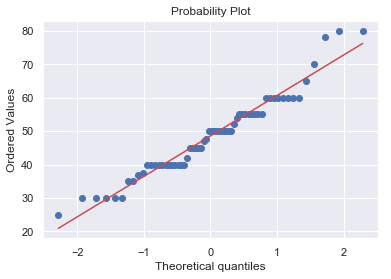

In [43]:
import scipy.stats as stats
import pylab
stats.probplot(ug_stud['Salary'], dist="norm",plot=pylab)
pylab.show()

In [44]:
from scipy.stats import shapiro
stat, p = shapiro(ug_stud['Salary'])
p

0.028000956401228905

In [22]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('We failed to reject null hypothesis i.e. H0 is accepted')
else:
    print('We reject null hypothesis i.e. H1 is accepted')

Statistics=0.957, p=0.028
We reject null hypothesis i.e. H1 is accepted


In [23]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.01
if p > alpha:
    print('We failed to reject null hypothesis i.e. H0 is accepted')
else:
    print('We reject null hypothesis i.e. H1 is accepted')

Statistics=0.957, p=0.028
We failed to reject null hypothesis i.e. H0 is accepted


In [50]:
from scipy.stats import normaltest
stat, p = normaltest(ug_stud['Salary'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=3.846, p=0.146
Sample looks Gaussian (fail to reject H0)


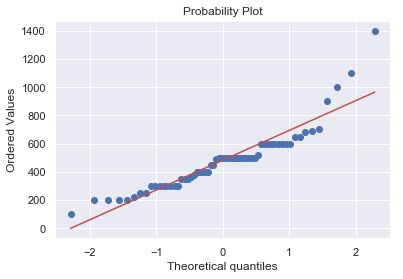

In [43]:
import scipy.stats as stats
import pylab
stats.probplot(ug_stud['Spending'], dist="norm",plot=pylab)
pylab.show()

In [25]:
from scipy.stats import shapiro
stat, p = shapiro(ug_stud['Spending'])
p

1.6854661225806922e-05

In [26]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('We failed to reject null hypothesis i.e. H0 is accepted')
else:
    print('We reject null hypothesis i.e. H1 is accepted')

Statistics=0.878, p=0.000
We reject null hypothesis i.e. H1 is accepted


In [49]:
from scipy.stats import normaltest
stat, p = normaltest(ug_stud['Spending'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=30.496, p=0.000
Sample does not look Gaussian (reject H0)


In [27]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.01
if p > alpha:
    print('We failed to reject null hypothesis i.e. H0 is accepted')
else:
    print('We reject null hypothesis i.e. H1 is accepted')

Statistics=0.878, p=0.000
We reject null hypothesis i.e. H1 is accepted


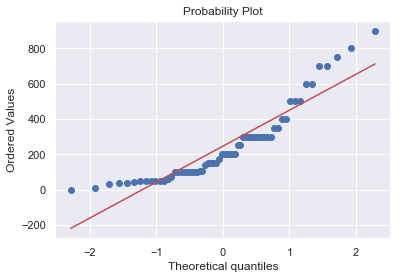

In [45]:
import scipy.stats as stats
import pylab
stats.probplot(ug_stud['Text Messages'], dist="norm",plot=pylab)
pylab.show()

In [28]:
from scipy.stats import shapiro
stat, p = shapiro(ug_stud['Text Messages'])
p

4.324040673964191e-06

In [29]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('We failed to reject null hypothesis i.e. H0 is accepted')
else:
    print('We reject null hypothesis i.e. H1 is accepted')

Statistics=0.859, p=0.000
We reject null hypothesis i.e. H1 is accepted


In [30]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.01
if p > alpha:
    print('We failed to reject null hypothesis i.e. H0 is accepted')
else:
    print('We reject null hypothesis i.e. H1 is accepted')

Statistics=0.859, p=0.000
We reject null hypothesis i.e. H1 is accepted


# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet  is given:

LaTeX: H_0<=0.35

LaTeX: H_A>0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

LaTeX: H_0<=0.35

LaTeX: H_A>0.35




In [7]:
ABCshingles_df = pd.read_csv('A+&+B+shingles.csv')

In [8]:
ABCshingles_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [4]:
ABCshingles_df.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [5]:
ABCshingles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 656.0 bytes


In [6]:
#Given
from scipy import stats
from scipy.stats import ttest_1samp

In [7]:
hypothesised_mean = 0.35
t_statistic, p_value = ttest_1samp(ABCshingles_df['A'], hypothesised_mean )
print('One sample t test \nt statistic: {0} \np value: {1} '.format(t_statistic, p_value))
alpha_value = 0.05
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 
print ("One-sample t-test p-value=", p_value)

One sample t test 
t statistic: -1.4735046253382782 
p value: 0.14955266289815025 
Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
One-sample t-test p-value= 0.14955266289815025


In [8]:
hypothesised_mean = 0.35
t_statistic, p_value = ttest_1samp(ABCshingles_df['B'].dropna(), hypothesised_mean)
print('One sample t test \nt statistic: {0} \np value: {1} '.format(t_statistic, p_value))
alpha_value = 0.05
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 
print ("One-sample t-test p-value=", p_value)

One sample t test 
t statistic: -3.1003313069986995 
p value: 0.004180954800638363 
Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
One-sample t-test p-value= 0.004180954800638363


3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?


In [25]:
#h0 : muA equal muB
#h1 : muA not equal muB

In [26]:
import scipy.stats as stats
from scipy.stats import ttest_ind
t_statistic, p_value  = ttest_ind(ABCshingles_df['A'],ABCshingles_df['B'].dropna())
print('Two sample t test \nt statistic: {0} \np value: {1} '.format(t_statistic, p_value))
alpha_level = 0.05
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean are same.')
print ("Two-sample t-test p-value=", p_value)

Two sample t test 
t statistic: 1.289628271966112 
p value: 0.2017496571835328 
Level of significance: 0.05
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that mean are same.
Two-sample t-test p-value= 0.2017496571835328


In [11]:
import scipy.stats as stats
from scipy.stats import ttest_ind
t_statistic, p_value  = ttest_ind(ABCshingles_df['A'],ABCshingles_df['B'] ,nan_policy='omit')
print('Two sample t test \nt statistic: {0} \np value: {1} '.format(t_statistic, p_value))
alpha_level = 0.05
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean are same.')
print ("Two-sample t-test p-value=", p_value)

Two sample t test 
t statistic: 1.2896282719661123 
p value: 0.2017496571835306 
Level of significance: 0.05
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that mean are same.
Two-sample t-test p-value= 0.2017496571835306


3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

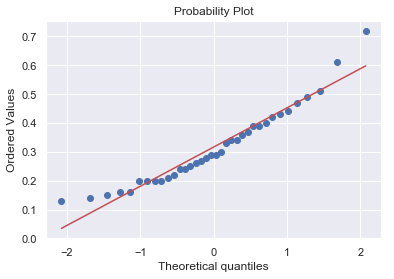

In [14]:
import scipy.stats as stats
import pylab
stats.probplot(ABCshingles_df['A'], dist="norm",plot=pylab)
pylab.show()

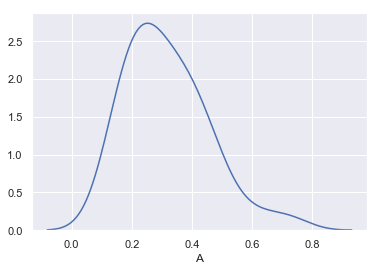

In [12]:
sns.distplot(ABCshingles_df['A'],hist=False);

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


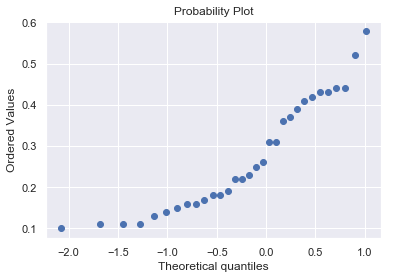

In [15]:
import scipy.stats as stats
import pylab
stats.probplot(ABCshingles_df['B'], dist="norm",plot=pylab)
pylab.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


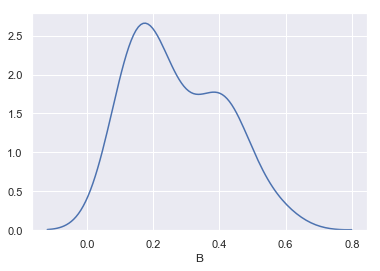

In [13]:
sns.distplot(ABCshingles_df['B'],hist=False);